In [1]:
import pandas as pd
import numpy as np

import tomotopy as to
import tomotopy.coherence as coherence

import time

from IPython import display
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
scores = pd.read_csv('TM-models-fit.csv', sep =';')
scores.loc[scores.Eta == '1,00E-05', 'Eta'] = 0.00001
scores.Eta = scores.Eta.astype('float')
models = scores.Model.unique()
print('Models:', *models)

Models: LDAModel HLDAModel PAModel HPAModel CTModel


## Looking into coherence scores for diff models

In [3]:
scores.sort_values(['Coherence'], ascending=False).head(5)

,Model,Depth (levels),Num of topics,Alpha,Subalpha,Eta,Gamma,Coherence,Log-likelihood
127,HPAModel,3.0,50,0.001,0.001,0.001,NaN,0.000000,-9.891722
85,PAModel,3.0,30,0.001,0.001,0.100,NaN,-1.245718,-10.646886
92,PAModel,3.0,15,0.001,0.001,0.500,NaN,-1.253410,-10.287370
101,PAModel,3.0,10,0.001,0.001,1.000,NaN,-1.271804,-9.831939
137,HPAModel,3.0,50,0.001,0.001,0.100,NaN,-1.305333,-9.440749


In [4]:
lda_scores = scores[scores.Model == 'LDAModel'].sort_values(['Coherence'], ascending=False)
lda_scores.head(5)

,Model,Depth (levels),Num of topics,Alpha,Subalpha,Eta,Gamma,Coherence,Log-likelihood
41,LDAModel,NaN,10,0.001,NaN,1.00000,NaN,-1.490927,-8.573679
10,LDAModel,NaN,5,0.001,NaN,0.00100,NaN,-1.552390,-8.472779
40,LDAModel,NaN,5,0.001,NaN,1.00000,NaN,-1.556807,-8.433136
21,LDAModel,NaN,10,0.001,NaN,0.10000,NaN,-1.558604,-8.348436
0,LDAModel,NaN,5,0.001,NaN,0.00001,NaN,-1.577870,-8.635659


In [5]:
hlda_scores = scores[scores.Model == 'HLDAModel'].sort_values(['Coherence'], ascending=False)
hlda_scores.head(5)

,Model,Depth (levels),Num of topics,Alpha,Subalpha,Eta,Gamma,Coherence,Log-likelihood
59,HLDAModel,3.0,4,0.001,NaN,1.0,0.001,-1.355141,-8.416453
58,HLDAModel,3.0,4,0.001,NaN,0.7,0.001,-1.877557,-8.382658
57,HLDAModel,3.0,4,0.001,NaN,0.5,0.001,-2.051054,-8.358642
56,HLDAModel,3.0,9,0.001,NaN,0.3,0.001,-3.706648,-8.334500
55,HLDAModel,3.0,12,0.001,NaN,0.2,0.001,-4.570531,-8.324062


In [6]:
pam_scores = scores[scores.Model == 'PAModel'].sort_values(['Coherence'], ascending=False)
pam_scores.head(5)

,Model,Depth (levels),Num of topics,Alpha,Subalpha,Eta,Gamma,Coherence,Log-likelihood
85,PAModel,3.0,30,0.001,0.001,0.10000,NaN,-1.245718,-10.646886
92,PAModel,3.0,15,0.001,0.001,0.50000,NaN,-1.253410,-10.287370
101,PAModel,3.0,10,0.001,0.001,1.00000,NaN,-1.271804,-9.831939
62,PAModel,3.0,15,0.001,0.001,0.00001,NaN,-1.332677,-9.856382
100,PAModel,3.0,5,0.001,0.001,1.00000,NaN,-1.451975,-9.662306


In [7]:
hpam_scores = scores[scores.Model == 'HPAModel'].sort_values(['Coherence'], ascending=False)
hpam_scores.head(5)

,Model,Depth (levels),Num of topics,Alpha,Subalpha,Eta,Gamma,Coherence,Log-likelihood
127,HPAModel,3.0,50,0.001,0.001,0.001,NaN,0.000000,-9.891722
137,HPAModel,3.0,50,0.001,0.001,0.100,NaN,-1.305333,-9.440749
134,HPAModel,3.0,25,0.001,0.001,0.100,NaN,-1.307249,-9.504061
132,HPAModel,3.0,15,0.001,0.001,0.100,NaN,-1.312842,-9.778869
138,HPAModel,3.0,60,0.001,0.001,0.100,NaN,-1.316144,-9.448982


In [8]:
ctm_scores = scores[scores.Model == 'CTModel'].sort_values(['Coherence'], ascending=False)
ctm_scores.head(5)

,Model,Depth (levels),Num of topics,Alpha,Subalpha,Eta,Gamma,Coherence,Log-likelihood
190,CTModel,NaN,5,0.001,NaN,0.50000,NaN,-1.456252,-8.046996
160,CTModel,NaN,5,0.001,NaN,0.00001,NaN,-1.499020,-7.751768
200,CTModel,NaN,5,0.001,NaN,1.00000,NaN,-1.509612,-8.228495
170,CTModel,NaN,5,0.001,NaN,0.00100,NaN,-1.546036,-7.623363
180,CTModel,NaN,5,0.001,NaN,0.10000,NaN,-1.550607,-7.735565


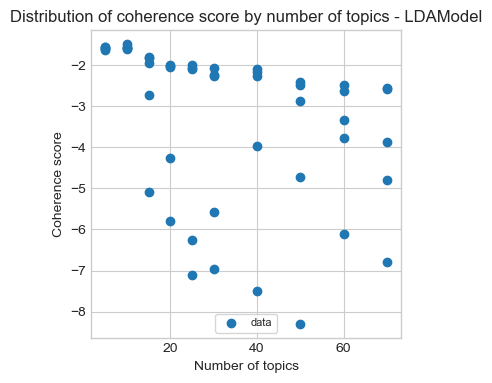

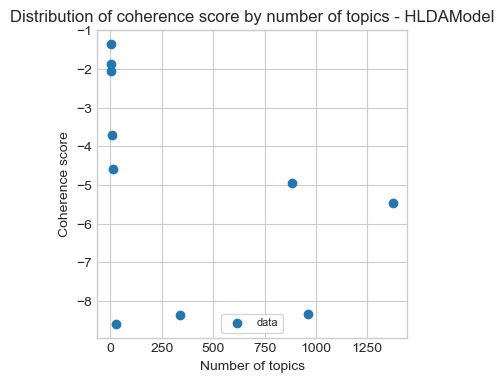

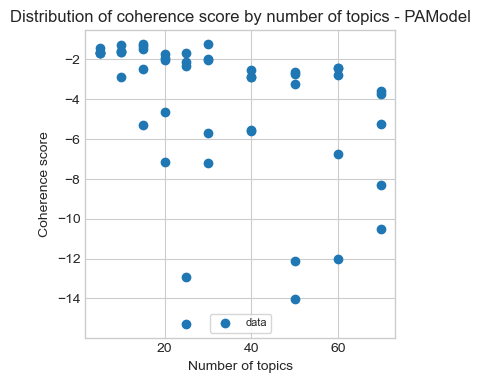

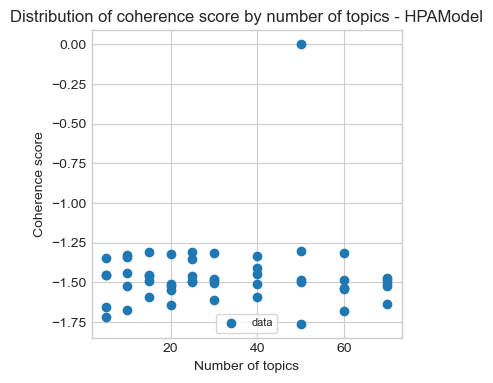

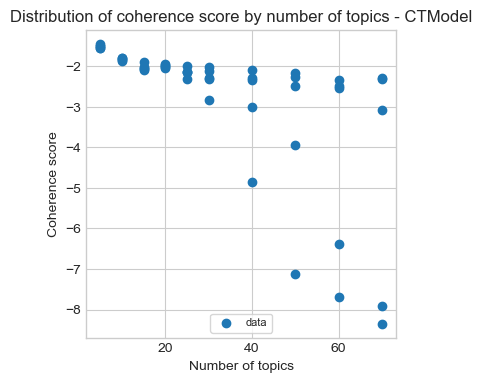

In [9]:
for model in models:

    plt.style.use('seaborn-v0_8-whitegrid')
    
    plt.figure(figsize=(4, 4))
    plt.scatter(scores[scores.Model==model].sort_values('Num of topics')['Num of topics'],
                scores[scores.Model==model].sort_values('Num of topics')['Coherence'],
                label='data')
    plt.xlabel('Number of topics')
    plt.ylabel('Coherence score')
    plt.title('Distribution of coherence score by number of topics - ' + model)
    plt.legend(prop={'size': 8}, frameon=True, loc='lower center', ncol=2)
    plt.show()

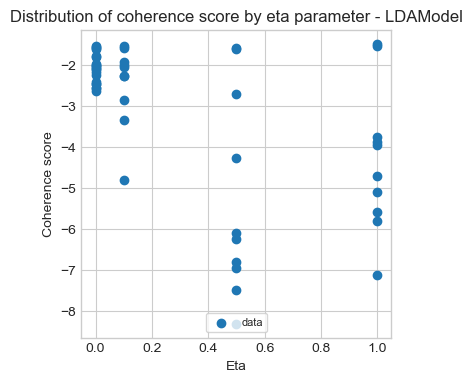

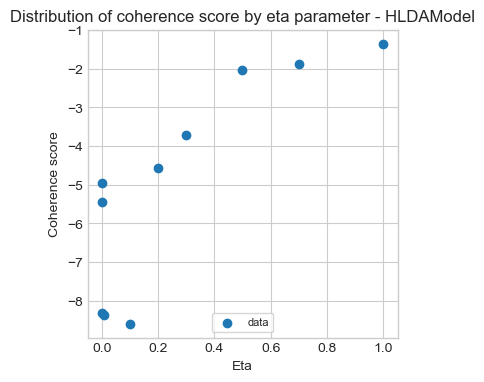

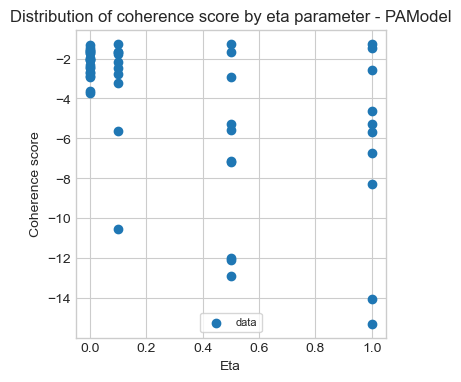

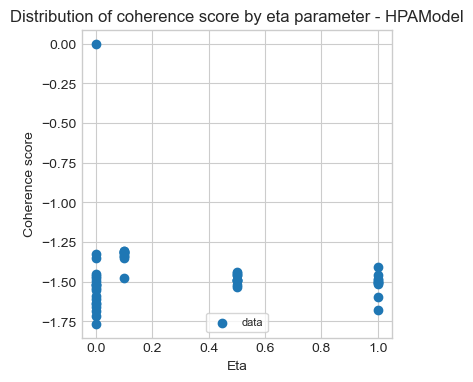

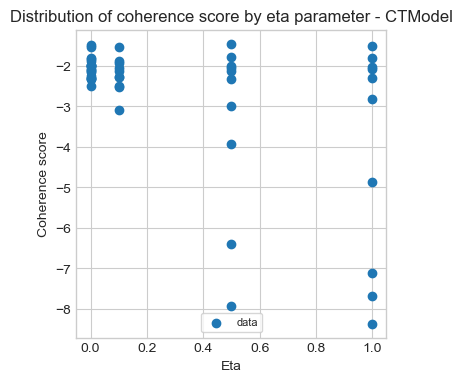

In [10]:
for model in models:

    plt.style.use('seaborn-v0_8-whitegrid')
    
    plt.figure(figsize=(4, 4))
    plt.scatter(scores[scores.Model==model].sort_values('Eta')['Eta'],
                scores[scores.Model==model].sort_values('Eta')['Coherence'],
                label='data')
    plt.xlabel('Eta')
    plt.ylabel('Coherence score')
    plt.title('Distribution of coherence score by eta parameter - ' + model)
    plt.legend(prop={'size': 8}, frameon=True, loc='lower center', ncol=2)
    plt.show()

In [11]:
# For each model type we take the best one in terms of coherence score
top_models=\
pd.DataFrame([lda_scores.iloc[0],
              hlda_scores.iloc[0], 
              pam_scores.iloc[0], 
              hpam_scores.iloc[0], 
              ctm_scores.iloc[0]])
top_models

,Model,Depth (levels),Num of topics,Alpha,Subalpha,Eta,Gamma,Coherence,Log-likelihood
41,LDAModel,NaN,10,0.001,NaN,1.000,NaN,-1.490927,-8.573679
59,HLDAModel,3.0,4,0.001,NaN,1.000,0.001,-1.355141,-8.416453
85,PAModel,3.0,30,0.001,0.001,0.100,NaN,-1.245718,-10.646886
127,HPAModel,3.0,50,0.001,0.001,0.001,NaN,0.000000,-9.891722
190,CTModel,NaN,5,0.001,NaN,0.500,NaN,-1.456252,-8.046996


## Looking into the topics of the top 5 models

In [12]:
seed = 12345

In [13]:
# Loading data - dataset containing lemmatized texts
names = ['id',
         'headline',
         'description',
         'article_body',
         'all_text',
         'text_lem',
         'date',
         'newspaper',
         'city',
         'md_index',
         'url']

data = pd.read_excel('SV-women-data-lem.xlsx',
                     index_col = 0,
                     names = names)

# Getting docs from data
docs = pd.DataFrame(data.text_lem)

# Extract unique words and calculate their number
uniq_words = list(filter(lambda x: x, set(docs.text_lem.str.cat(sep=' ').strip().split(' '))))
uniq_words_len = len(uniq_words)
print('The number of unique words is', uniq_words_len)

# Transform documents into word lists
words_in_docs = list(map(lambda x: x.split(), docs.text_lem.dropna().values))

The number of unique words is 63240


In [14]:
'''
# Topic distribution for each document (probabilities)
mdl.docs[0].get_topic_dist() 

# Word distribution for each topic (only probabilities)
mdl.get_topic_word_dist(topic_id = 0)

# Word distribution for each topic (words + probabilities)
mdl.get_topic_words(topic_id=0, top_n=50)

# Number of words allocated to each topic (num)
mdl.get_count_by_topics()

# hLDA Words distribution for each of the live topics (only probabilities)
words_topics_distr = list(map(lambda x: hlda.get_topic_word_dist(x) if hlda.is_live_topic(x) else [], range(hlda.k)))
'''

print('')

In [15]:
def get_unique_words(mdl, ids):
    unique_topic_words = []
    for topic_id in ids:
        unique_words = []
        top50_others = []
        for topic_id_add in ids:
            if topic_id_add != topic_id:
                for word in mdl.get_topic_words(topic_id=topic_id_add, top_n=50):
                    top50_others.append(word[0])
        for word in mdl.get_topic_words(topic_id=topic_id, top_n=50):
            if word[0] not in top50_others:
                unique_words.append(word)
        unique_topic_words.append(unique_words)
    unique_topic_words_str = []
    for topic in unique_topic_words:
        words = ''
        for word in topic:
            words = words + ' ' + str(word[0])
        unique_topic_words_str.append(words.strip())
    return(unique_topic_words_str)

def get_all_words(mdl, ids):
    all_topic_words = []
    for topic_id in ids:
        words = ''
        for word in mdl.get_topic_words(topic_id=topic_id, top_n=50):
            words = words + ' ' + str(word[0])
        all_topic_words.append(words.strip())
    return(all_topic_words)

def get_unique_words_pa(mdl, ids):
    unique_topic_words = []
    for topic_id in ids:
        unique_words = []
        top50_others = []
        for topic_id_add in ids:
            if topic_id_add != topic_id:
                for word in mdl.get_topic_words(sub_topic_id=topic_id_add, top_n=50):
                    top50_others.append(word[0])
        for word in mdl.get_topic_words(sub_topic_id=topic_id, top_n=50):
            if word[0] not in top50_others:
                unique_words.append(word)
        unique_topic_words.append(unique_words)
    unique_topic_words_str = []
    for topic in unique_topic_words:
        words = ''
        for word in topic:
            words = words + ' ' + str(word[0])
        unique_topic_words_str.append(words.strip())
    return(unique_topic_words_str)

def get_all_words_pa(mdl, ids):
    all_topic_words = []
    for topic_id in ids:
        words = ''
        for word in mdl.get_topic_words(sub_topic_id=topic_id, top_n=50):
            words = words + ' ' + str(word[0])
        all_topic_words.append(words.strip())
    return(all_topic_words)

## LDA model

In [16]:
top_models[top_models.Model == 'LDAModel']

,Model,Depth (levels),Num of topics,Alpha,Subalpha,Eta,Gamma,Coherence,Log-likelihood
41,LDAModel,NaN,10,0.001,NaN,1.0,NaN,-1.490927,-8.573679


In [17]:
k = 10
alpha=0.001
eta=1

In [18]:
%%time

lda = to.LDAModel(k=k, alpha=alpha, eta=eta, seed=seed)
list(map(lda.add_doc, words_in_docs))
lda.train(workers=1, iter = 100)
print(lda.summary(topic_word_top_n = 30), end='\n\n')

ch = coherence.Coherence(lda, top_n = 50)
print('-----------------------------------------------')
print('Coherence score =', ch.get_score(), end='\n\n')

<Basic Info>
| LDAModel (current version: 0.12.7)
| 15342 docs, 2850809 words
| Total Vocabs: 63240, Used Vocabs: 63240
| Entropy of words: 8.23205
| Entropy of term-weighted words: 8.23205
| Removed Vocabs: <NA>
|
<Training Info>
| Iterations: 100, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -8.53386
|
<Initial Parameters>
| tw: TermWeight.ONE
| min_cf: 0 (minimum collection frequency of words)
| min_df: 0 (minimum document frequency of words)
| rm_top: 0 (the number of top words to be removed)
| k: 10 (the number of topics between 1 ~ 32767)
| alpha: [0.001] (hyperparameter of Dirichlet distribution for document-topic, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 1.0 (hyperparameter of Dirichlet distribution for topic-word)
| seed: 12345 (random seed)
| trained in version 0.12.7
|
<Parameters>
| alpha (Dirichlet prior on the per-document topic distributions)
|  [0.1248738

In [19]:
all_topic_words = get_all_words(lda, np.arange(k))
unique_topic_words = get_unique_words(lda, np.arange(k))

lda_topics = pd.DataFrame({'topic_id' : np.arange(k), 'all_words': all_topic_words, 'unique_words': unique_topic_words})
lda_topics.to_excel('HPA-topics.xlsx')
lda_topics

,topic_id,all_words,unique_words
0,0,мужчина изнасилование женщина изнасиловать дел...,полиция район полицейский возбудить орган сотр...
1,1,сексуальный год насилие обвинение сборная трен...,сборная тренер игрок футболист клуб расследова...
2,2,аргумент хачатурян неделя премия допускаться д...,аргумент хачатурян неделя премия допускаться д...
3,3,год сексуальный обвинение женщина насилие домо...,актёр вайнштейн актриса американский продюсер ...
4,4,женщина насилие сексуальный год человек страна...,страна организация оон число закон проблема во...
5,5,правда ру семёнович дизайн новиков редактор пе...,правда ру семёнович дизайн новиков петросян го...
6,6,год суд изнасилование убийство дело преступлен...,убийство колония свобода признать приговор лиш...
7,7,коммуникация новость массовый связь эл фс сайт...,коммуникация массовый связь фс сайт цифровой м...
8,8,макгрегор нижегородский боец конора ufc област...,макгрегор нижегородский боец конора ufc проект...
9,9,мочь год человек говорить ребёнок стать девушк...,говорить история жизнь очень сказать хотеть зн...


## hLDA model

In [20]:
top_models[top_models.Model == 'HLDAModel']

,Model,Depth (levels),Num of topics,Alpha,Subalpha,Eta,Gamma,Coherence,Log-likelihood
59,HLDAModel,3.0,4,0.001,NaN,1.0,0.001,-1.355141,-8.416453


In [21]:
depth = 3
alpha = 0.001
eta = 1
gamma = 0.001

In [22]:
%%time

hlda = to.HLDAModel(depth=depth, alpha=alpha, eta=eta, gamma=gamma, seed=seed)
list(map(hlda.add_doc, words_in_docs))
hlda.train(workers=1, iter = 100)
hlda.summary(topic_word_top_n = 30)

ch = coherence.Coherence(hlda, top_n = 50)
print('-----------------------------------------------')
print('Coherence score =', ch.get_score(), end='\n\n')

<Basic Info>
| HLDAModel (current version: 0.12.7)
| 15342 docs, 2850809 words
| Total Vocabs: 63240, Used Vocabs: 63240
| Entropy of words: 8.23205
| Entropy of term-weighted words: 8.23205
| Removed Vocabs: <NA>
|
<Training Info>
| Iterations: 100, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -8.36528
|
<Initial Parameters>
| tw: TermWeight.ONE
| min_cf: 0 (minimum collection frequency of words)
| min_df: 0 (minimum document frequency of words)
| rm_top: 0 (the number of top words to be removed)
| depth: 3 (the maximum depth level of hierarchy between 2 ~ 32767)
| alpha: [0.001] (hyperparameter of Dirichlet distribution for document-depth level, given as a single `float` in case of symmetric prior and as a list with length `depth` of `float` in case of asymmetric prior.)
| eta: 1.0 (hyperparameter of Dirichlet distribution for topic-word)
| gamma: 0.001 (concentration coeficient of Dirichlet Process)
| seed: 12345 (random seed)
| trained in version 0.12.7
|

In [23]:
hlda_ids = []
for topic_id in np.arange(hlda.k):
    if hlda.is_live_topic(topic_id) == True:
        hlda_ids.append(topic_id)

all_topic_words = get_all_words(hlda, hlda_ids)
unique_topic_words = get_unique_words(hlda, hlda_ids)

hlda_topics = pd.DataFrame({'topic_id': hlda_ids, 'all_words': all_topic_words, 'unique_words': unique_topic_words})
hlda_topics.to_excel('hLDA-topics.xlsx')
hlda_topics

,topic_id,all_words,unique_words
0,0,новость массовый эл коммуникация сайт связь го...,массовый эл коммуникация сайт фс ооо технологи...
1,8,год изнасилование мужчина дело женщина изнасил...,следственный район потерпевший житель москва в...
2,9,i and was my the a that it this hair be with w...,i and was my the a that it this hair be with w...
3,16,год сексуальный насилие женщина обвинение домо...,сша случай против говорить страна актёр сказат...
4,17,м ф б паук самка далее самец очень паутина пти...,м ф б паук самка далее самец очень паутина пти...
5,18,класс pdt internal женщина сексуальный изнасил...,класс pdt internal день


## PAM model

In [24]:
top_models[top_models.Model == 'PAModel']

,Model,Depth (levels),Num of topics,Alpha,Subalpha,Eta,Gamma,Coherence,Log-likelihood
85,PAModel,3.0,30,0.001,0.001,0.1,NaN,-1.245718,-10.646886


In [25]:
depth = 3
k = 30
alpha = 0.001
eta = 1

In [26]:
%%time

pa = to.PAModel(k1=depth, k2=k, alpha=alpha, subalpha=alpha, eta=eta, seed=seed)
list(map(pa.add_doc, words_in_docs))
pa.train(workers=1, iter = 100)
pa.summary(topic_word_top_n = 30)

ch = coherence.Coherence(pa, top_n = 50)
print('-----------------------------------------------')
print('Coherence score =', ch.get_score(), end='\n\n')

<Basic Info>
| PAModel (current version: 0.12.7)
| 15342 docs, 2850809 words
| Total Vocabs: 63240, Used Vocabs: 63240
| Entropy of words: 8.23205
| Entropy of term-weighted words: 8.23205
| Removed Vocabs: <NA>
|
<Training Info>
| Iterations: 100, Burn-in steps: 0
| Optimization Interval: 1
| Log-likelihood per word: -10.22205
|
<Initial Parameters>
| tw: TermWeight.ONE
| min_cf: 0 (minimum collection frequency of words)
| min_df: 0 (minimum document frequency of words)
| rm_top: 0 (the number of top words to be removed)
| k1: 3 (the number of super topics between 1 ~ 32767)
| k2: 30 (the number of sub topics between 1 ~ 32767)
| alpha: [0.001] (initial hyperparameter of Dirichlet distribution for document-super topic, given as a single `float` in case of symmetric prior and as a list with length `k1` of `float` in case of asymmetric prior.)
| subalpha: [0.001] (initial hyperparameter of Dirichlet distribution for super-sub topic, given as a single `float` in case of symmetric prior a

In [27]:
all_topic_words = get_all_words_pa(pa, np.arange(k))
unique_topic_words = get_unique_words_pa(pa, np.arange(k))

pa_topics = pd.DataFrame({'topic_id' : np.arange(k), 'all_words': all_topic_words, 'unique_words': unique_topic_words})
pa_topics.to_excel('PA-topics.xlsx')
pa_topics

,topic_id,all_words,unique_words
0,0,коллектор долг новосибирский искитим семья дол...,коллектор долг новосибирский искитим должница ...
1,1,сабрина куидёр медуня уолтон софи лионна уиссе...,сабрина куидёр медуня уолтон софи лионна уиссе...
2,2,японский утешение корея япония сеул памятник б...,японский утешение корея япония сеул памятник б...
3,3,аргумент неделя нижегородский редакция дзен до...,аргумент неделя нижегородский допускаться испо...
4,4,титан mirage assassin creed дюкурно xbox пальм...,титан mirage assassin creed дюкурно xbox пальм...
5,5,год мочь человек ребёнок говорить стать маньяк...,маньяк знать мать хотеть жить девочка отец про...
6,6,yung trappa рэпер ширяев владислав подборовие ...,yung trappa рэпер ширяев владислав подборовие ...
7,7,священник церковь католический папа римский нс...,священник церковь католический папа римский нс...
8,8,мужчина женщина изнасиловать изнасилование зад...,москва насильник улица город квартира напасть ...
9,9,м ф б паук самка самец паутина птицеед каракур...,м ф б паук самка самец паутина птицеед каракур...


## HPAM model

In [28]:
top_models[top_models.Model == 'HPAModel']

,Model,Depth (levels),Num of topics,Alpha,Subalpha,Eta,Gamma,Coherence,Log-likelihood
127,HPAModel,3.0,50,0.001,0.001,0.001,NaN,0.0,-9.891722


In [29]:
depth = 3
k = 50
alpha = 0.001
eta = 0.001

In [30]:
%%time

hpa = to.HPAModel(k1=depth, k2=k, alpha=alpha, subalpha=alpha, eta=eta, seed=seed)
list(map(hpa.add_doc, words_in_docs))
hpa.train(workers=1, iter = 100)
hpa.summary(topic_word_top_n = 30)

ch = coherence.Coherence(hpa, top_n = 50)
print('-----------------------------------------------')
print('Coherence score =', ch.get_score(), end='\n\n')

<Basic Info>
| HPAModel (current version: 0.12.7)
| 15342 docs, 2850809 words
| Total Vocabs: 63240, Used Vocabs: 63240
| Entropy of words: 8.23205
| Entropy of term-weighted words: 8.23205
| Removed Vocabs: <NA>
|
<Training Info>
| Iterations: 100, Burn-in steps: 0
| Optimization Interval: 1
| Log-likelihood per word: -9.79218
|
<Initial Parameters>
| tw: TermWeight.ONE
| min_cf: 0 (minimum collection frequency of words)
| min_df: 0 (minimum document frequency of words)
| rm_top: 0 (the number of top words to be removed)
| k1: 3 (the number of super topics between 1 ~ 32767)
| k2: 50 (the number of sub topics between 1 ~ 32767)
| alpha: [0.001] (initial hyperparameter of Dirichlet distribution for document-topic, given as a single `float` in case of symmetric prior and as a list with length `k1 + 1` of `float` in case of asymmetric prior.)
| subalpha: [0.001] (initial hyperparameter of Dirichlet distribution for super-sub topic, given as a single `float` in case of symmetric prior and

In [31]:
all_topic_words = get_all_words(hpa, np.arange(hpa.k1 + hpa.k2 + 1))
unique_topic_words = get_unique_words(hpa, np.arange(hpa.k1 + hpa.k2 + 1))

hpa_topics = pd.DataFrame({'topic_id' : np.arange(hpa.k1 + hpa.k2 + 1), 'all_words': all_topic_words, 'unique_words': unique_topic_words})
hpa_topics.to_excel('HPA-topics.xlsx')
hpa_topics

,topic_id,all_words,unique_words
0,0,мужчина женщина изнасиловать девушка дом жертв...,знакомый улица решить напасть попытаться избит...
1,1,изнасилование дело уголовный задержать действи...,следственный ск возбудить управление ч скр сов...
2,2,мочь говорить человек история сказать очень хо...,говорить очень сделать рассказывать делать хор...
3,3,человек мочь должный закон новый случай являть...,среди результат депутат цель
4,4,футболист алвес клуб изнасилование барселона с...,футболист алвес барселона дань бразилия бразил...
5,5,публикация нота культура большой сериал интере...,нота интересный нажать крис сюда русвидетельст...
6,6,эл год фс сайт известие ооо право миц коммуник...,фс известие миц свидетельство регистрация заре...
7,7,дело суд обвинение адвокат судебный прокуратур...,прокурор заседание процесс доказать слушание с...
8,8,сексуальный насилие год оон случай человек пре...,оон доклад исследование частый опрос опросить ...
9,9,украина военный украинский армия россия россий...,украина украинский солдат роналда боевик белор...


## CTM model

In [32]:
top_models[top_models.Model == 'CTModel']

,Model,Depth (levels),Num of topics,Alpha,Subalpha,Eta,Gamma,Coherence,Log-likelihood
190,CTModel,NaN,5,0.001,NaN,0.5,NaN,-1.456252,-8.046996


In [33]:
depth = 3
k = 5
alpha = 0.001
eta = 0.5

In [34]:
%%time

ctm = to.CTModel(k=k, smoothing_alpha=alpha, eta=eta, seed=seed)
list(map(ctm.add_doc, words_in_docs))
ctm.train(workers=1, iter = 100)
ctm.summary(topic_word_top_n = 30)

ch = coherence.Coherence(pa, top_n = 50)
print('-----------------------------------------------')
print('Coherence score =', ch.get_score(), end='\n\n')

<Basic Info>
| CTModel (current version: 0.12.7)
| 15342 docs, 2850809 words
| Total Vocabs: 63240, Used Vocabs: 63240
| Entropy of words: 8.23205
| Entropy of term-weighted words: 8.23205
| Removed Vocabs: <NA>
|
<Training Info>
| Iterations: 100, Burn-in steps: 0
| Optimization Interval: 2
| Log-likelihood per word: -8.04029
|
<Initial Parameters>
| tw: TermWeight.ONE
| min_cf: 0 (minimum collection frequency of words)
| min_df: 0 (minimum document frequency of words)
| rm_top: 0 (the number of top words to be removed)
| k: 5 (the number of topics between 1 ~ 32767)
| smoothing_alpha: [0.001] (small smoothing value for preventing topic counts to be zero, given as a single `float` in case of symmetric and as a list with length `k` of `float` in case of asymmetric.)
| eta: 0.5 (hyperparameter of Dirichlet distribution for topic-word)
| seed: 12345 (random seed)
| trained in version 0.12.7
|
<Parameters>
| prior_mean (Prior mean of Logit-normal for the per-document topic distributions)


In [35]:
all_topic_words = get_all_words(ctm, np.arange(k))
unique_topic_words = get_unique_words(ctm, np.arange(k))

ctm_topics = pd.DataFrame({'topic_id' : np.arange(k), 'all_words': all_topic_words, 'unique_words': unique_topic_words})
ctm_topics.to_excel('CTM-topics.xlsx')
ctm_topics

,topic_id,all_words,unique_words
0,0,женщина изнасиловать мужчина дело задержать го...,произойти сотрудник потерпевший данные москва ...
1,1,изнасилование год женщина сексуальный мужчина ...,первый признать ск июль нападение орган новый ...
2,2,год сексуальный женщина насилие обвинение дело...,несколько получить бывший эл служба дать орган...
3,3,год сексуальный насилие женщина изнасилование ...,сторона работа лицо октябрь отдел страна несов...
4,4,год сексуальный женщина мужчина отношение случ...,случай против сказать коммуникация материал сш...


## Selected model (HPAM) overview + adding topics probs to dataset

In [36]:
data.head(5)

,id,headline,description,article_body,all_text,text_lem,date,newspaper,city,md_index,url
0,1,«Женщины для утех» по-прежнему нужны: Япония и...,Во время колонизации Кореи Японией в XX веке к...,Во время колонизации Кореи Японией в XX веке к...,«Женщины для утех» по-прежнему нужны: Япония и...,женщина утеха нужный япония китай борьба время...,2016-01-03,ИА Regnum,Москва,2.312,http://regnum.ru/news/2048238.html
1,2,В Норвегии мигрантов научат не насиловать женщин,Наплыв беженцев из Сирии и других стран Ближне...,\n ...,В Норвегии мигрантов научат не насиловать женщ...,норвегия мигрант научить насиловать беженец си...,2016-01-04,Известия (iz.ru),Москва,1.113,http://izvestia.ru/news/600956
2,3,Полиция Кельна опровергла сообщения о нападени...,Канцлер ФРГ Ангела Меркель назвала правонаруше...,Об этом сообщил спикер правительства ФРГ Штефф...,Полиция Кельна опровергла сообщения о нападени...,полиция кёльн опровергнуть сообщение нападение...,2016-01-05,Российская газета (rg.ru),Москва,1.266,http://www.rg.ru/2016/01/05/keln-site.html
3,4,Меркель потребовала дать жесткий ответ на напа...,\tКанцлер Германии Ангела Меркель потребовала ...,"Сейчас+6˚CСейчас в Санкт-ПетербургеОблачно, Бе...",Меркель потребовала дать жесткий ответ на напа...,меркель потребовать дать жёсткий ответ нападен...,2016-01-05,Фонтанка (fontanka.ru),Санкт-Петербург,1.186,http://www.fontanka.ru/2016/01/05/077/
4,5,В центре Кельна около тысячи мигрантов устроил...,Полиция Германии расследует информацию о серий...,"По словам жертв, они попали в агрессивную толп...",В центре Кельна около тысячи мигрантов устроил...,центр кёльн тысяча мигрант устроить новогодний...,2016-01-06,Комсомольская правда (kp.ru),Москва,0.960,http://www.kp.ru/daily/26476/3347751/


In [37]:
hpa.summary(topic_word_top_n = 30)

<Basic Info>
| HPAModel (current version: 0.12.7)
| 15342 docs, 2850809 words
| Total Vocabs: 63240, Used Vocabs: 63240
| Entropy of words: 8.23205
| Entropy of term-weighted words: 8.23205
| Removed Vocabs: <NA>
|
<Training Info>
| Iterations: 100, Burn-in steps: 0
| Optimization Interval: 1
| Log-likelihood per word: -9.79218
|
<Initial Parameters>
| tw: TermWeight.ONE
| min_cf: 0 (minimum collection frequency of words)
| min_df: 0 (minimum document frequency of words)
| rm_top: 0 (the number of top words to be removed)
| k1: 3 (the number of super topics between 1 ~ 32767)
| k2: 50 (the number of sub topics between 1 ~ 32767)
| alpha: [0.001] (initial hyperparameter of Dirichlet distribution for document-topic, given as a single `float` in case of symmetric prior and as a list with length `k1 + 1` of `float` in case of asymmetric prior.)
| subalpha: [0.001] (initial hyperparameter of Dirichlet distribution for super-sub topic, given as a single `float` in case of symmetric prior and

In [38]:
hpa_topics

,topic_id,all_words,unique_words
0,0,мужчина женщина изнасиловать девушка дом жертв...,знакомый улица решить напасть попытаться избит...
1,1,изнасилование дело уголовный задержать действи...,следственный ск возбудить управление ч скр сов...
2,2,мочь говорить человек история сказать очень хо...,говорить очень сделать рассказывать делать хор...
3,3,человек мочь должный закон новый случай являть...,среди результат депутат цель
4,4,футболист алвес клуб изнасилование барселона с...,футболист алвес барселона дань бразилия бразил...
5,5,публикация нота культура большой сериал интере...,нота интересный нажать крис сюда русвидетельст...
6,6,эл год фс сайт известие ооо право миц коммуник...,фс известие миц свидетельство регистрация заре...
7,7,дело суд обвинение адвокат судебный прокуратур...,прокурор заседание процесс доказать слушание с...
8,8,сексуальный насилие год оон случай человек пре...,оон доклад исследование частый опрос опросить ...
9,9,украина военный украинский армия россия россий...,украина украинский солдат роналда боевик белор...


In [39]:
topic_probs = []
for i in np.arange(docs.shape[0]):
    doc_probs = hpa.docs[i].get_topic_dist()
    topic_probs.append(doc_probs)
topic_probs = np.array(topic_probs)

topic_probs = pd.DataFrame(topic_probs)
data_topics = pd.concat([data, topic_probs], axis=1)
data_topics.to_excel('SV-women-data-lem-topicsraw.xlsx')